# Difference in Difference Prescriptions

In [1]:
import pandas as pd
import numpy as np
Prescriptions = pd.read_csv('Prescription-Pop-merge.csv')
Prescriptions

,State,County,MME,Population,Year,Treatment,_merge,Prescr_rate
0,Florida,Alachua,1.645948e+12,237199.0,2006,Treatment,both,6.939103e+06
1,Florida,Alachua,1.972812e+12,240196.0,2007,Treatment,both,8.213343e+06
2,Florida,Alachua,2.540522e+12,242133.0,2008,Treatment,both,1.049226e+07
3,Florida,Alachua,3.180395e+12,243574.0,2009,Treatment,both,1.305720e+07
4,Florida,Alachua,3.293852e+12,247336.0,2010,Treatment,both,1.331732e+07
...,...,...,...,...,...,...,...,...
3910,North Carolina,Yancey,1.539797e+10,17818.0,2010,Control,both,8.641808e+05
3911,North Carolina,Yancey,1.563721e+10,17677.0,2011,Control,both,8.846076e+05
3912,North Carolina,Yancey,1.553954e+10,17615.0,2012,Control,both,8.821764e+05
3913,North Carolina,Yancey,1.706678e+10,17555.0,2013,Control,both,9.721892e+05


In [2]:
pre_FL=Prescriptions[(Prescriptions.State=='Florida')&(Prescriptions.Year<2010)] # filtering for pre policy years for Florida 
post_FL=Prescriptions[(Prescriptions.State=='Florida')&(Prescriptions.Year>=2010)] #post policy year for florida
pre_contr=Prescriptions[(Prescriptions.Treatment=='Control')&(Prescriptions.Year<2010)] # filtering for pre policy years for thr control states:North Carolina,Georgia and Kentucky
post_contr=Prescriptions[(Prescriptions.Treatment=='Control')&(Prescriptions.Year>=2010)] # filtering for post policy years for thr control states:North Carolina,Georgia and Kentucky

In [3]:
from plotnine import *
def diffIndiff(prepolicy_contr,postpolicy_contr,prepolicy_treatment,postpolicy_treatment,xvar,yvar,policyyear):
    m=(
    ggplot()
    # plot all chosen states,  pre policy year
    + geom_smooth(
        prepolicy_contr,
        aes(x=xvar, y=yvar,color="Treatment"),
        method="lm",
    )
    # plot all chosen states, post policy year
    + geom_smooth(
        postpolicy_contr,
        aes(x=xvar, y=yvar,color="Treatment"),
        method="lm",
    )
    # plot treatment, pre policy year
    + geom_smooth(
        prepolicy_treatment,
        aes(x=xvar, y=yvar, color="Treatment"),
        method="lm",
    )
    # plot treatment, post policy year
    + geom_smooth(
        postpolicy_treatment,
        aes(x=xvar, y=yvar, color="Treatment"),
        method="lm",
    )
    + geom_vline(xintercept=policyyear, linetype="dotted")
    + xlab("Year")
    + theme_classic(base_family="Times")
    + scale_x_continuous(breaks=[2006, 2008, 2010, 2012,2014], limits=[2006, 2014])
    )
    return m

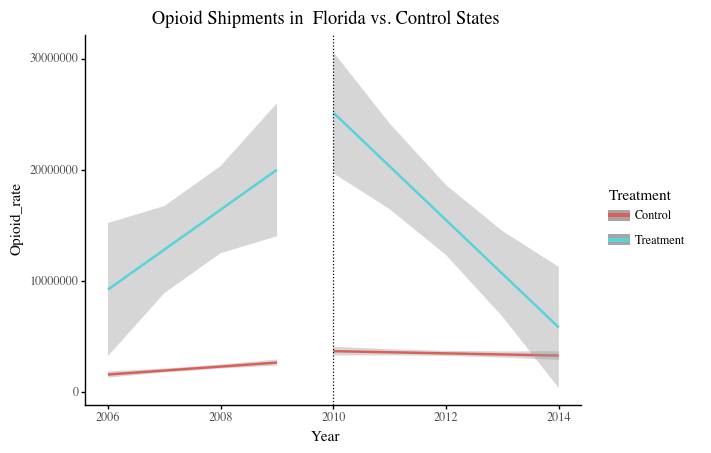

<ggplot: (306929911)>

In [6]:
m=diffIndiff(pre_contr,post_contr,pre_FL,post_FL,'Year','Prescr_rate',2010)+ labs(title="Opioid Shipments in  Florida vs. Control States", color="Treatment")+ylab("Opioid_rate")
#ggsave(plot=m,filename='FLOpioid-Shipments.png')
m

In [5]:
# IGNORE THIS PART FOR NOW
#Cant figure out how to use Nick's suggested plotting
# def get_reg_fit(data, yvar, xvar, alpha=0.05):
#     import statsmodels.formula.api as smf

#     # Grid for predicted values
#     x = data.loc[pd.notnull(data[yvar]), xvar]
#     print(x)
#     xmin = x.min()
#     xmax = x.max()
#     step = 1
#     grid = np.arange(xmin, xmax+step , step)
#     predictions = pd.DataFrame({xvar:grid})

#     # Fit model, get predictions
#     model = smf.ols(f"{yvar} ~ {xvar}", data=data).fit()
#     model_predict = model.get_prediction(predictions[xvar])
#     predictions[yvar] = model_predict.summary_frame()["mean"]
#     predictions[["ci_low", "ci_high"]] = model_predict.conf_int(alpha=alpha)

#     # Build chart
#     predictions[xvar]=pd.to_datetime(predictions[xvar],format="%Y")
#     print(predictions)
#     reg = alt.Chart(predictions).mark_line().encode(x=xvar, y=yvar)
#     ci = (
#         alt.Chart(predictions)
#         .mark_errorband()
#         .encode(
#             x=xvar,
#             y=alt.Y("ci_low", title=yvar),
#             y2="ci_high",
#         )
#     )
#     chart = ci+reg
#     return predictions, chart
#     x,y=get_reg_fit(pre_contr, yvar='Prescr_rate', xvar='Year', alpha=0.05)